2023


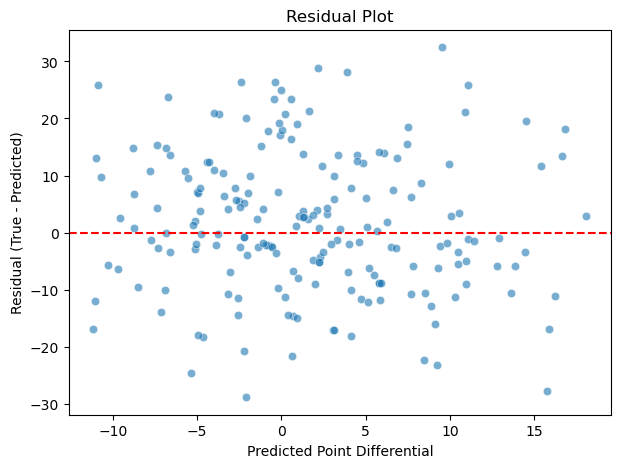

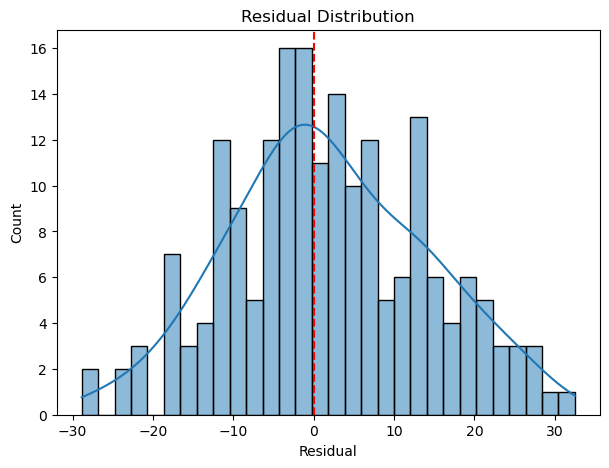

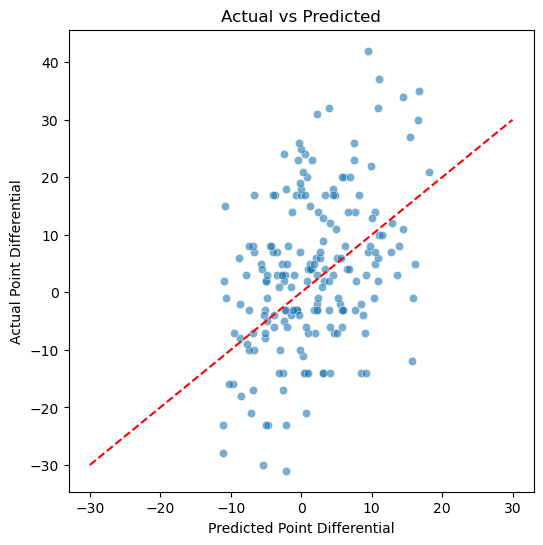

2024


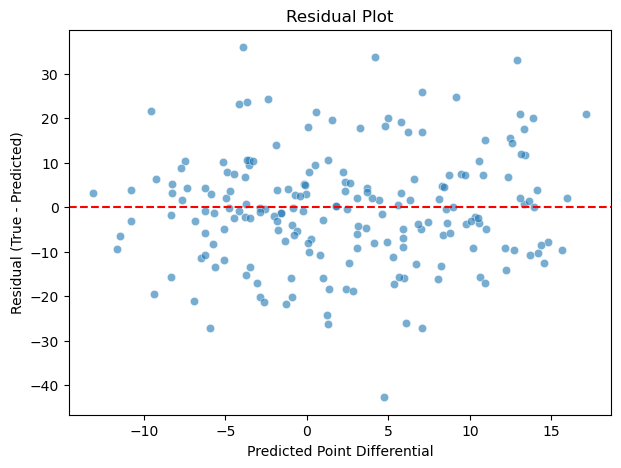

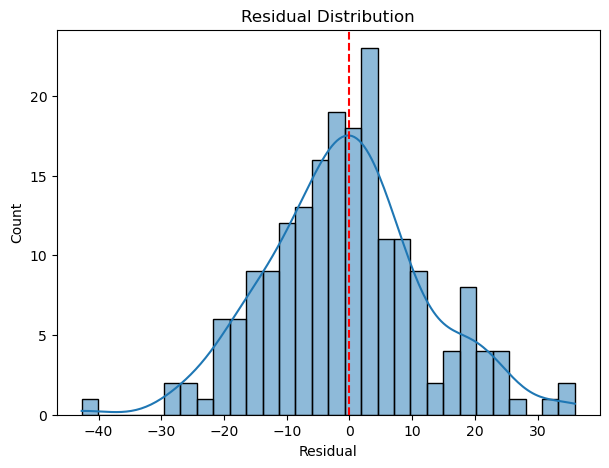

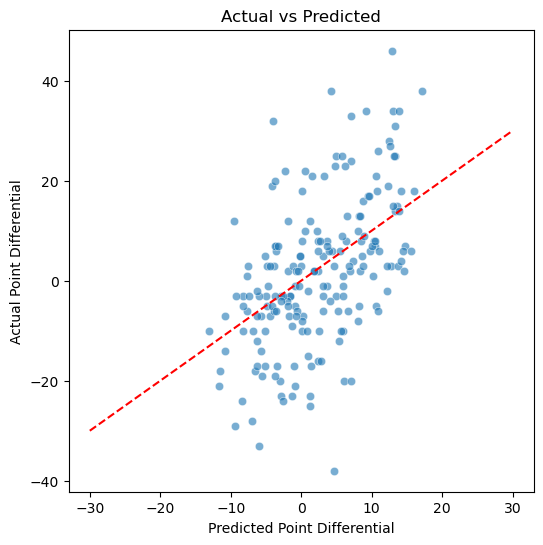

2025


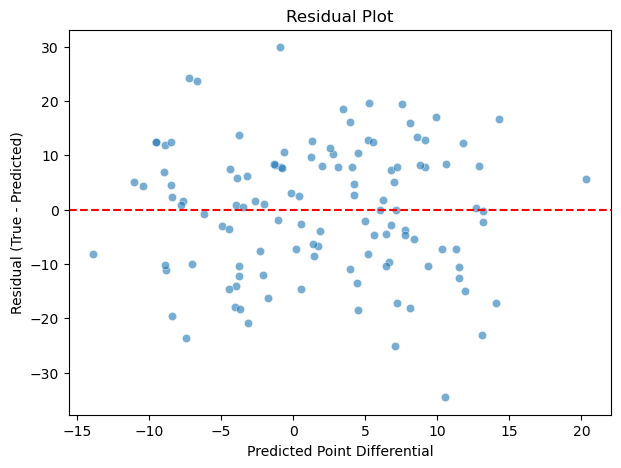

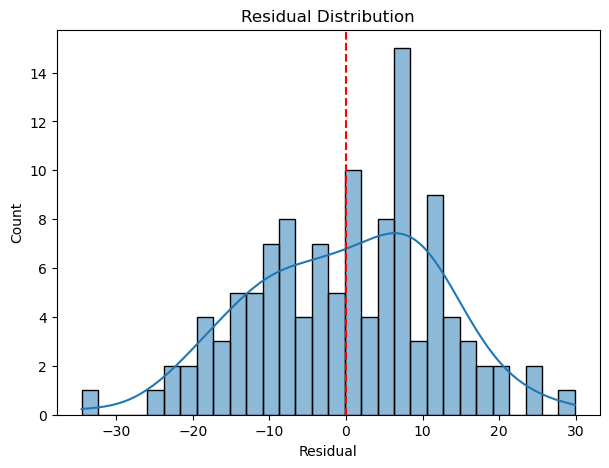

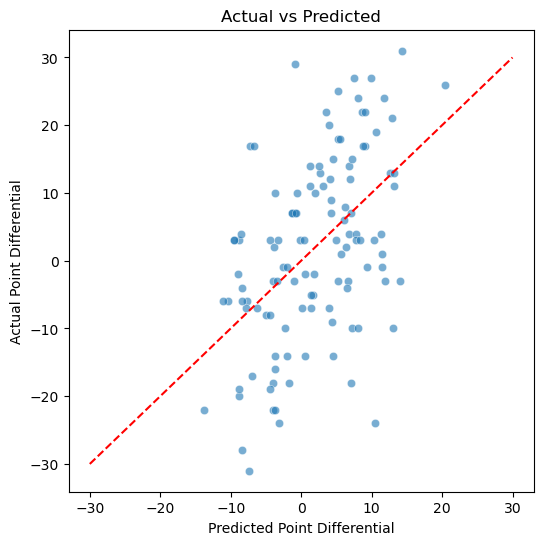

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df23 = pd.read_csv("/Users/ryansteele/my_repo2/reports/predictions_test_2023.csv")
df24 = pd.read_csv("/Users/ryansteele/my_repo2/reports/predictions_test_2024.csv")
df25 = pd.read_csv("/Users/ryansteele/my_repo2/reports/predictions_test_2025.csv")

def plot_residuals(y_true, y_pred, title="Residual Plot"):
        residuals = y_true - y_pred
        
        plt.figure(figsize=(7,5))
        sns.scatterplot(x=y_pred, y=residuals, alpha=0.6)
        plt.axhline(0, color="red", linestyle="--")
        plt.xlabel("Predicted Point Differential")
        plt.ylabel("Residual (True - Predicted)")
        plt.title(title)
        plt.show()

def plot_residual_distribution(y_true, y_pred, title="Residual Distribution"):
    residuals = y_true - y_pred
    
    plt.figure(figsize=(7,5))
    sns.histplot(residuals, kde=True, bins=30)
    plt.axvline(0, color="red", linestyle="--")
    plt.xlabel("Residual")
    plt.title(title)
    plt.show()

def plot_actual_vs_pred(y_true, y_pred, title="Actual vs Predicted"):
    plt.figure(figsize=(6,6))
    sns.scatterplot(x=y_pred, y=y_true, alpha=0.6)
    plt.plot([-30, 30], [-30, 30], "--", color="red")  # ideal line
    plt.xlabel("Predicted Point Differential")
    plt.ylabel("Actual Point Differential")
    plt.title(title)
    plt.show()

dfs = [df23, df24, df25]
for df in dfs:
    y_true = df["y_true"]
    y_pred = df["y_pred"]
    print(df["season"][1])
    plot_residuals(y_true, y_pred)
    plot_residual_distribution(y_true, y_pred)
    plot_actual_vs_pred(y_true, y_pred)


Found files: ['predictions_test_2023.csv', 'predictions_test_2024.csv', 'predictions_test_2025.csv']


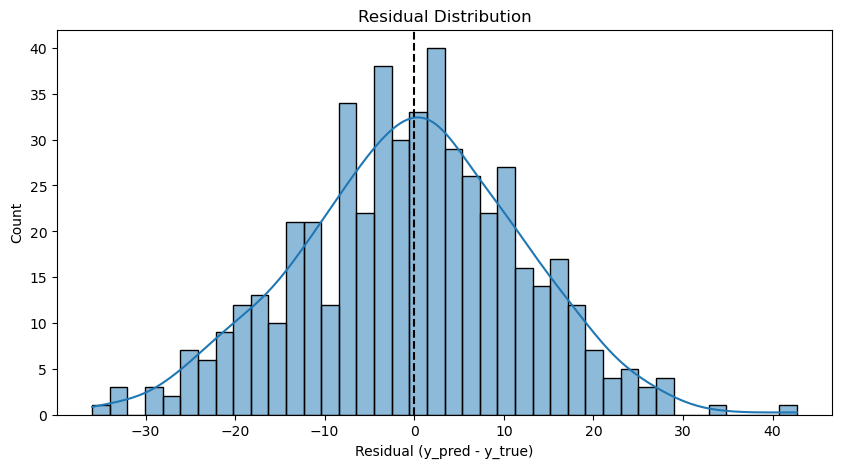

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

results_dir = Path("/Users/ryansteele/my_repo2/reports")

files_test = sorted(results_dir.glob("predictions_test_*.csv"))

print("Found files:", [f.name for f in files_test])

dfs = [pd.read_csv(f) for f in files_test]
df_test_all = pd.concat(dfs, ignore_index=True)
df_test_all = df_test_all.sort_values(["season", "week", "team"]).reset_index(drop=True)

df_test_all["residual"] = df_test_all["y_pred"] - df_test_all["y_true"]
df_test_all["abs_residual"] = df_test_all["residual"].abs()

plt.figure(figsize=(10,5))
sns.histplot(df_test_all["residual"], bins=40, kde=True)
plt.axvline(0, color="black", linestyle="--")
plt.title("Residual Distribution")
plt.xlabel("Residual (y_pred - y_true)")
plt.ylabel("Count")
plt.show()

In [16]:
df_test_all["abs_residual"] = (df_test_all["y_pred"] - df_test_all["y_true"]).abs()

top10 = df_test_all.nlargest(10, "abs_residual")
top10[["season", "week", "team", "opponent", "y_true", "y_pred", "abs_residual"]]


,season,week,team,opponent,y_true,y_pred,abs_residual
197,2024,6,DAL,DET,-38.0,4.708579,42.708579
271,2024,11,DEN,ATL,32.0,-3.945830,35.945830
418,2025,8,ATL,MIA,-24.0,10.506151,34.506151
376,2024,18,DEN,KC,38.0,4.168532,33.831468
272,2024,11,DET,JAX,46.0,12.921737,33.078263
140,2023,15,LV,LAC,42.0,9.503901,32.496099
464,2025,11,JAX,LAC,29.0,-0.896136,29.896136
64,2023,10,JAX,SF,-31.0,-2.129249,28.870751
189,2023,18,NO,ATL,31.0,2.180013,28.819987
15,2023,7,BAL,DET,32.0,3.894341,28.105660


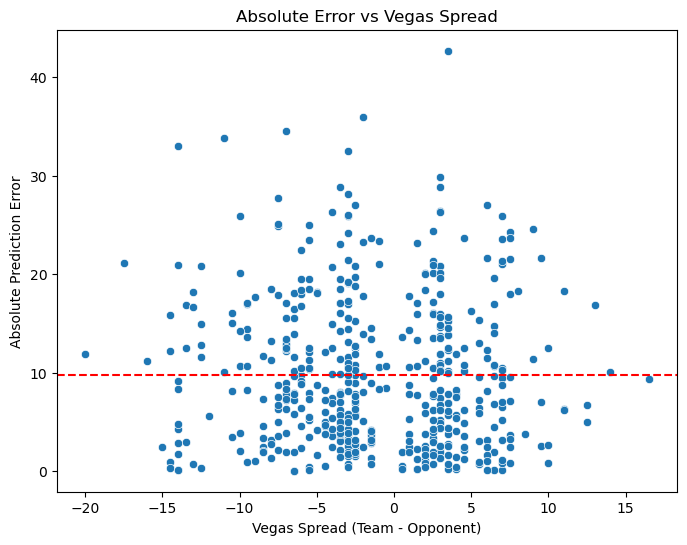

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df_test_all, x="vegas_spread", y="abs_residual")
plt.title("Absolute Error vs Vegas Spread")
plt.xlabel("Vegas Spread (Team - Opponent)")
plt.ylabel("Absolute Prediction Error")
plt.axhline(df_test_all["abs_residual"].mean(), color="red", linestyle="--")
plt.show()

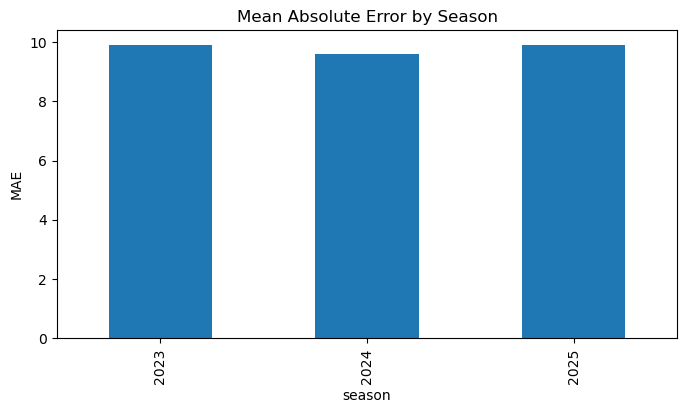

In [18]:
season_error = df_test_all.groupby("season")["abs_residual"].mean()

season_error.plot(kind="bar", figsize=(8,4), title="Mean Absolute Error by Season")
plt.ylabel("MAE")
plt.show()

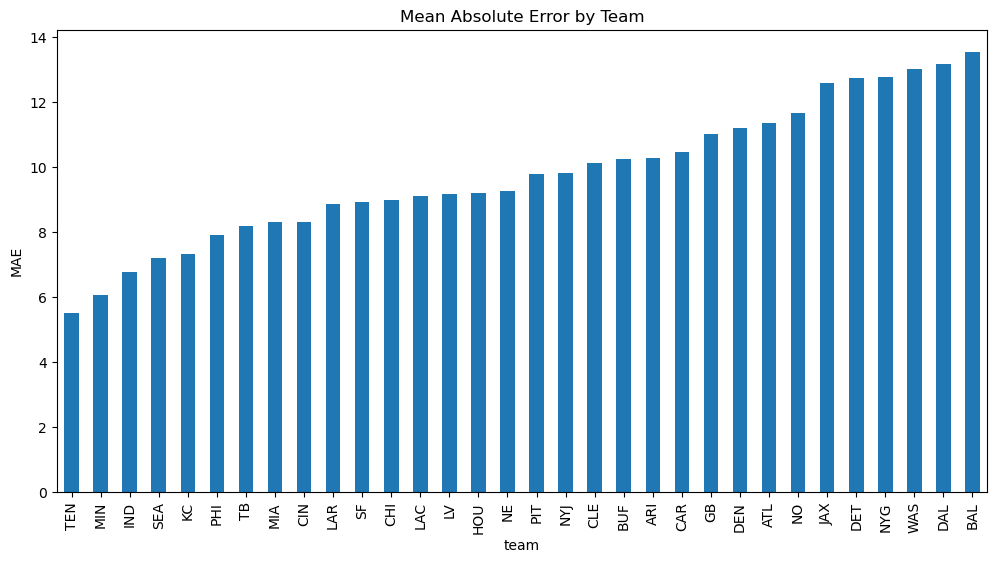

In [19]:
team_error = df_test_all.groupby("team")["abs_residual"].mean().sort_values()

team_error.plot(kind="bar", figsize=(12,6), title="Mean Absolute Error by Team")
plt.ylabel("MAE")
plt.show()

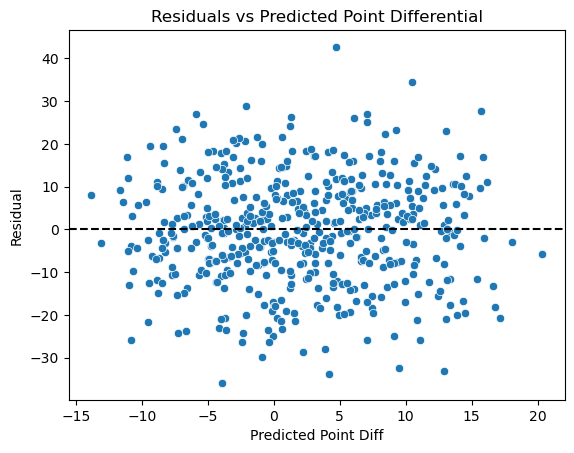

In [20]:
sns.scatterplot(x=df_test_all["y_pred"], y=df_test_all["residual"])
plt.axhline(0, color="black", linestyle="--")
plt.title("Residuals vs Predicted Point Differential")
plt.xlabel("Predicted Point Diff")
plt.ylabel("Residual")
plt.show()